In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
customer_data = pd.read_csv("/content/Mall_Customers.csv")

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.shape

(200, 5)

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<ipython-input-9-309c72ad9e23>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_data[x], bins =20)
<ipython-input-9-309c72ad9e23>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_data[x], bins =20)
<ipython-input-9-309c72ad9e23>:7: UserWarning: 

`distplot` is a deprecated func

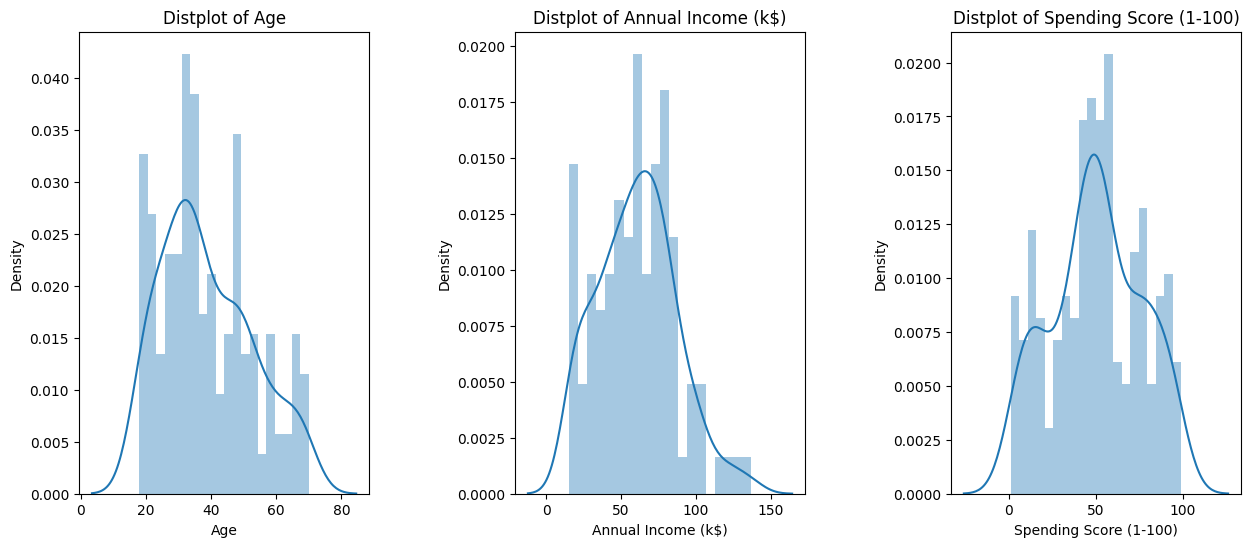

In [9]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace =0.5, wspace = 0.5)
  sns.distplot(customer_data[x], bins =20)
  plt.title('Distplot of {}'.format(x))
plt.show()


<ipython-input-10-ef45dfc09c44>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Gender", data=customer_data, palette="Set1")


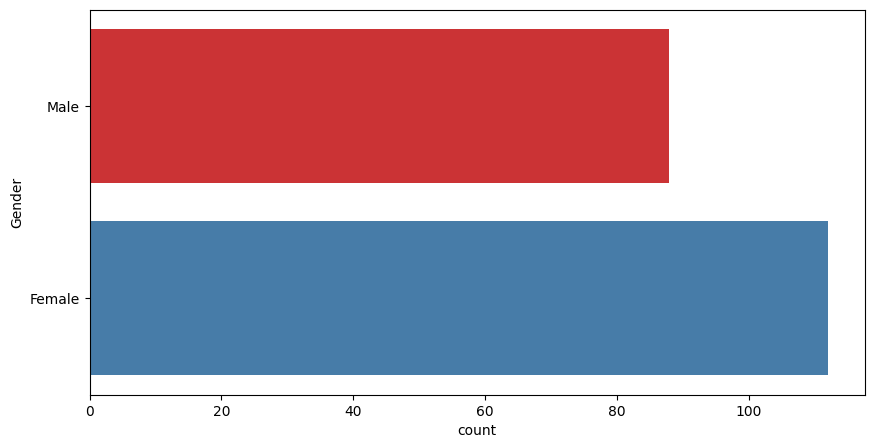

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(y="Gender", data=customer_data, palette="Set1")
plt.show()

<ipython-input-11-08ac840f5d10>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex, y=agey, palette="mako")


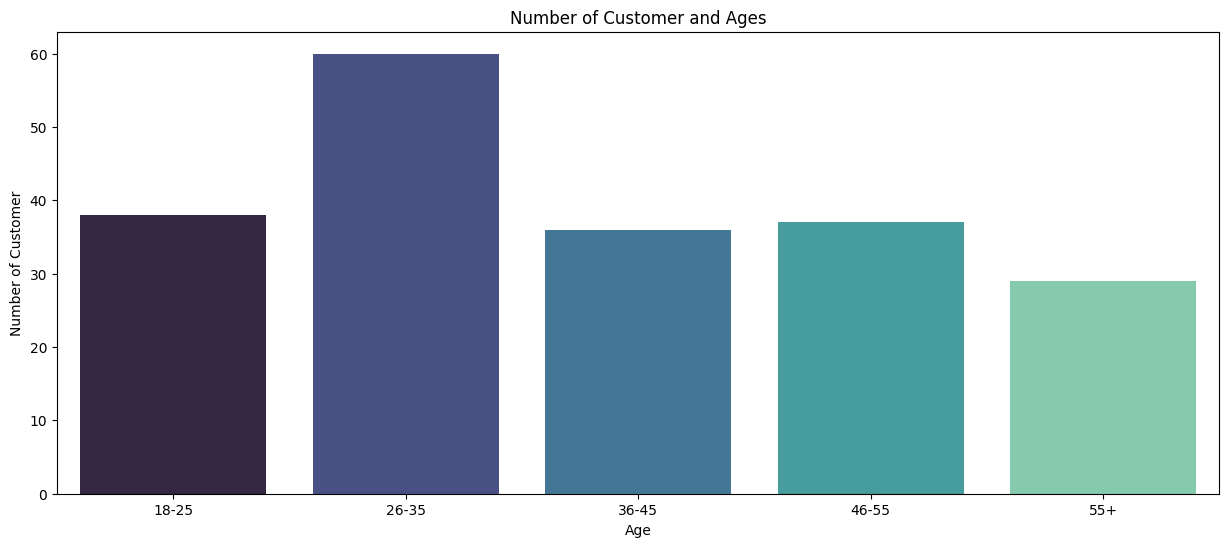

In [11]:
age_18_25 = customer_data.Age[(customer_data.Age >= 18) & (customer_data. Age <= 25)]
age_26_35  =customer_data.Age[(customer_data.Age >= 26) & (customer_data.Age <= 35)]
age_36_45 = customer_data.Age[(customer_data. Age >= 36) & (customer_data.Age <= 45)]
age_46_55 =customer_data.Age [(customer_data.Age >= 46) & (customer_data.Age <= 55)]
age_55above = customer_data.Age[customer_data.Age >= 56]
agex = ["18-25","26-35","36-45","46-55","55+"]
agey = [len (age_18_25.values), len(age_26_35.values), len(age_36_45.values), len (age_46_55.values), len(age_55above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

<ipython-input-12-029fc3e5577a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ssx, y=ssy, palette="rocket")


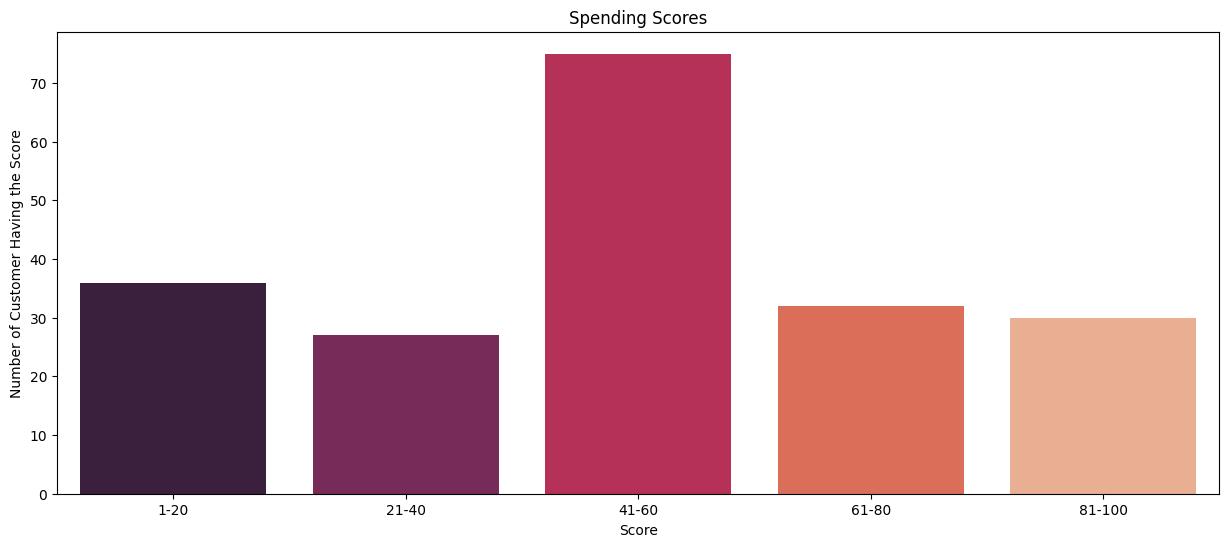

In [12]:
ss_1_20 =customer_data["Spending Score (1-100)"] [(customer_data ["Spending Score (1-100)"] >= 1) & (customer_data["Spending Score (1-100)"] <= 20)]
ss_21_40 =customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 21) & (customer_data["Spending Score (1-100)"] <= 40)]
ss_41_60 =customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 41) & (customer_data["Spending Score (1-100)"] <= 60)]
ss_61_80 =customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 61) & (customer_data["Spending Score (1-100)"] <= 80)]
ss_81_100 =customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 81) & (customer_data["Spending Score (1-100)"] <= 100)]
ssx=["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy=[len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

<ipython-input-13-7406d8838f72>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aix, y=aiy, palette="tab10")


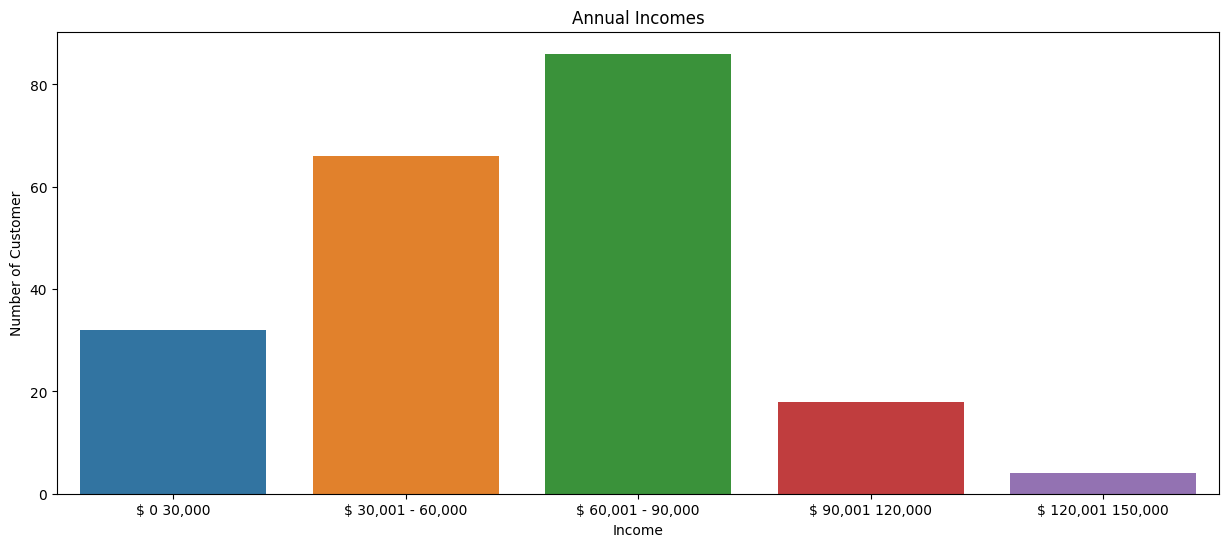

In [13]:
aie_30=customer_data ["Annual Income (k$)"][(customer_data ["Annual Income (k$)"] >=0) & (customer_data["Annual Income (k$)"] <= 30)]
ai31_60 =customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 31) & (customer_data["Annual Income (k$)"] <= 60)]
ai61_90 =customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 61) & (customer_data["Annual Income (k$)"] <= 98)]
ai91_120 =customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 91) & (customer_data["Annual Income (k$)"] <= 120)]
ai121_158 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 121) & (customer_data["Annual Income (k$)"] <= 150)]
aix=["$ 0 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 120,000", "$ 120,001 150,000"]
aiy=[len(aie_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_158.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="tab10")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

In [14]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

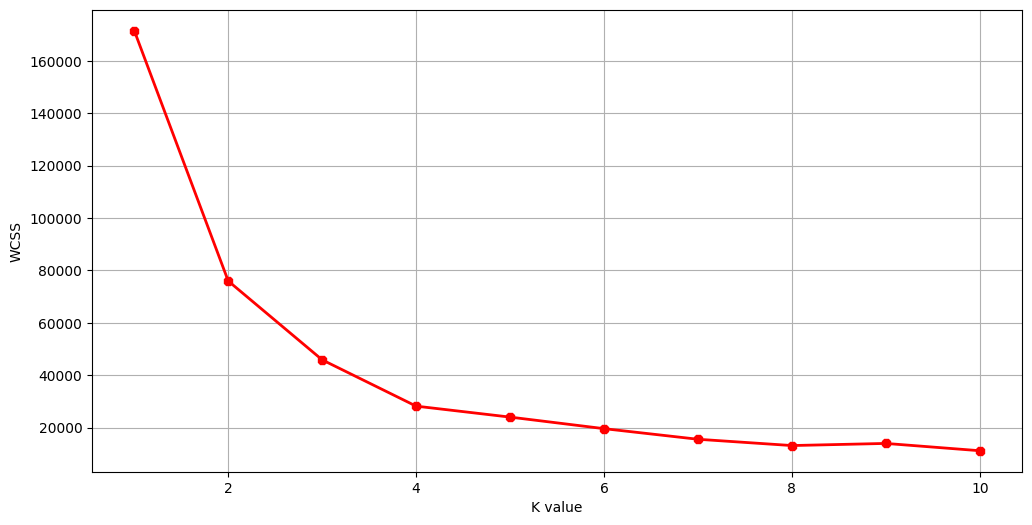

In [16]:
X1 = customer_data[['Age', 'Spending Score (1-100)']].values


from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
     kmeans=KMeans(n_clusters=k, init="k-means++")
     kmeans.fit(X1)
     wcss.append(kmeans. inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()


In [18]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X1)
print(label)

[1 2 3 2 1 2 3 2 4 2 4 2 4 2 3 2 1 2 4 2 1 2 4 2 4 2 4 1 4 2 4 2 4 2 4 2 4
 2 3 2 0 2 0 1 4 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 2 3 2 0 2 4 2 4 2 1 2 3 2 4 2 3 2 4 2 1 2 3 2 0 2
 3 2 4 2 4 2 4 2 3 2 3 2 0 2 3 2 4 2 4 2 3 1 3 2 3 2 4 2 4 2 4 2 1 2 4 2 1
 2 4 2 4 2 3 2 3 2 4 2 4 2 3 2]


In [19]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [28.08695652 48.84782609]
 [30.         82.06896552]
 [30.55555556 13.05555556]
 [50.46666667 16.1       ]]


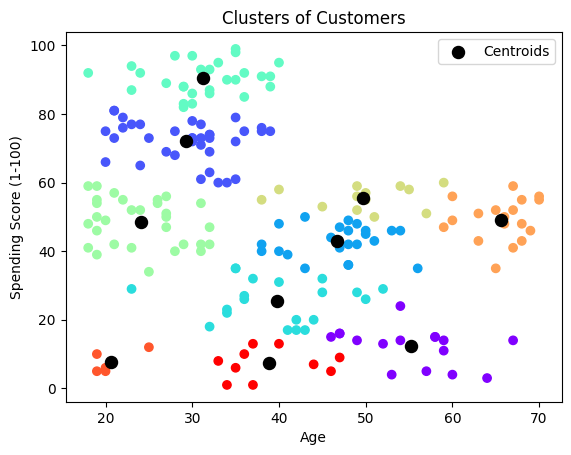

In [17]:
import matplotlib.pyplot as plt

plt.scatter(X1[:, 0], X1[:, 1], c=kmeans.labels_, cmap='rainbow')  # Data points
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='black', marker='.', label='Centroids')  # Cluster centers

plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


<class 'numpy.ndarray'>
